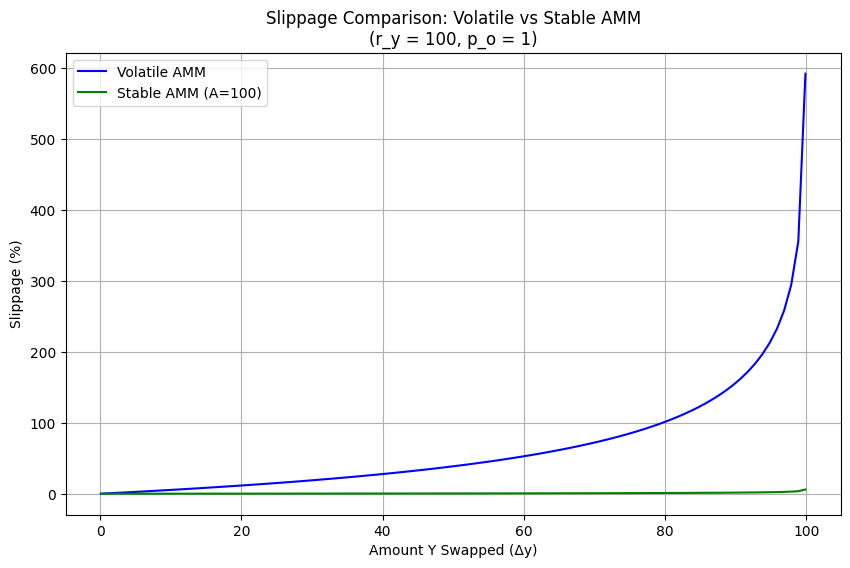

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Example usage:
reserve_y = 1000
oracle_price = 1.0
amount_y = 100
x_required = swap_x_from_y_stable(amount_y, reserve_y, oracle_price)
print(f"Required input amount x: {x_required}")

# Volatile AMM
def swap_x_to_y_volatile(amount_y, reserve_y, oracle_price):
    if amount_y >= reserve_y:
        return float('inf')
    return -oracle_price * reserve_y * np.log(1 - amount_y / reserve_y)

# Stable AMM
def swap_x_to_y_stable_from_output(amount_y, reserve_y, oracle_price, A=100):
    if amount_y >= reserve_y:
        return float('inf')
    z = amount_y / reserve_y
    return oracle_price * reserve_y * ((1 - 1/A) * z - (1/A) * np.log(1 - z))

# Plot slippage comparison
def plot_slippage_comparison():
    reserve_y = 100.0
    oracle_price = 1.0
    A = 100  # Amplification for stable swap
    dy_range = np.linspace(0.1, 99.9, 100)  # Avoid full depletion
    
    slippage_volatile = []
    slippage_stable = []
    
    for dy in dy_range:
        dx_volatile = swap_x_to_y_volatile(dy, reserve_y, oracle_price)
        dx_stable = swap_x_to_y_stable(dy, reserve_y, oracle_price, A)
        
        eff_price_volatile = dx_volatile / dy
        eff_price_stable = dx_stable / dy
        
        slippage_volatile.append((eff_price_volatile - oracle_price) / oracle_price * 100)
        slippage_stable.append((eff_price_stable - oracle_price) / oracle_price * 100)
    
    plt.figure(figsize=(10, 6))
    plt.plot(dy_range, slippage_volatile, label='Volatile AMM', color='blue')
    plt.plot(dy_range, slippage_stable, label=f'Stable AMM (A={A})', color='green')
    plt.xlabel('Amount Y Swapped (Δy)')
    plt.ylabel('Slippage (%)')
    plt.title('Slippage Comparison: Volatile vs Stable AMM\n(r_y = 100, p_o = 1)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the comparison
if __name__ == "__main__":
    plot_slippage_comparison()

In [13]:
#swap_x_to_y_stable(1, 2, 1, A=100)
#swap_x_to_y_volatile(1, 1, 1)

np.float64(1.005033585350145)

In [15]:
swap_x_to_y_stable(1, 2, 1, A=100)

np.float64(1.003862943611199)

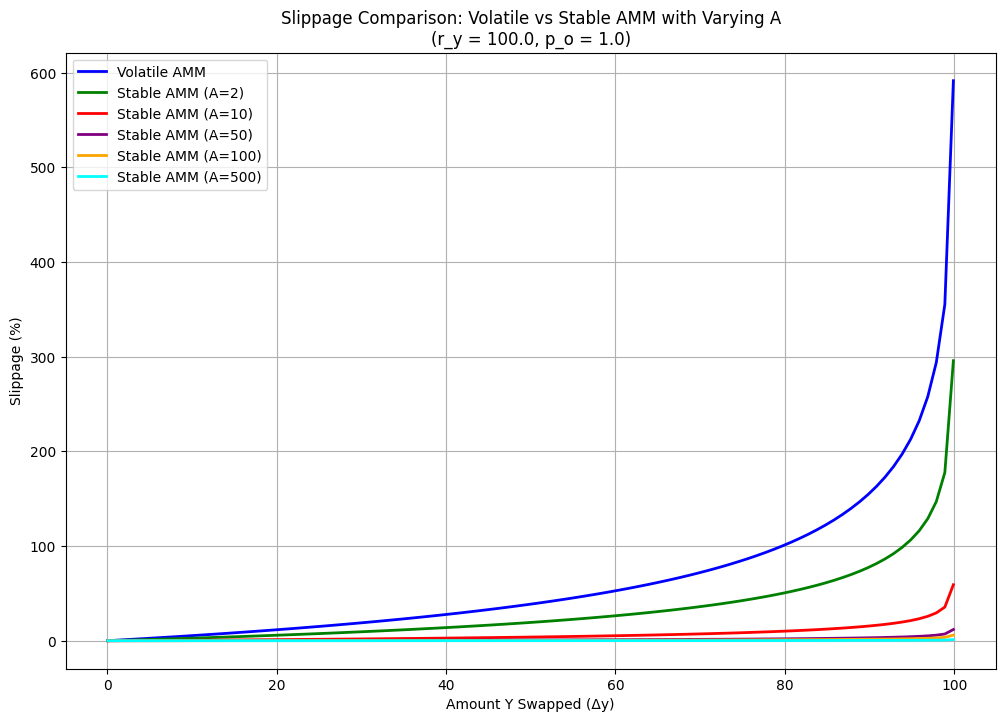

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Volatile AMM
def swap_x_to_y_volatile(amount_y, reserve_y, oracle_price):
    if amount_y >= reserve_y:
        return float('inf')
    return -oracle_price * reserve_y * np.log(1 - amount_y / reserve_y)

# Stable AMM
def swap_x_to_y_stable(amount_y, reserve_y, oracle_price, A=100):
    if amount_y >= reserve_y:
        return float('inf')
    z = amount_y / reserve_y
    return oracle_price * reserve_y * ((1 - 1/A) * z - (1/A) * np.log(1 - z))

# Plot slippage comparison with multiple stable AMM amplifiers
def plot_slippage_comparison_multiple_amplifiers(reserve_y=100.0, oracle_price=1.0, A_values=[10, 50, 100, 500], dy_max=99.9, num_points=100):
    """
    Plot slippage for volatile AMM and stable AMM with multiple A values.
    :param reserve_y: Initial reserve of Y
    :param oracle_price: Oracle price (X per Y)
    :param A_values: List of amplification factors for stable AMM
    :param dy_max: Maximum amount of Y to swap (less than reserve_y)
    :param num_points: Number of points in the dy range
    """
    dy_range = np.linspace(0.1, dy_max, num_points)  # Avoid full depletion
    
    # Calculate slippage for volatile AMM
    slippage_volatile = []
    for dy in dy_range:
        dx_volatile = swap_x_to_y_volatile(dy, reserve_y, oracle_price)
        eff_price_volatile = dx_volatile / dy
        slippage_volatile.append((eff_price_volatile - oracle_price) / oracle_price * 100)
    
    # Calculate slippage for stable AMM with different A values
    slippage_stable_dict = {}
    for A in A_values:
        slippage_stable = []
        for dy in dy_range:
            dx_stable = swap_x_to_y_stable(dy, reserve_y, oracle_price, A)
            eff_price_stable = dx_stable / dy
            slippage_stable.append((eff_price_stable - oracle_price) / oracle_price * 100)
        slippage_stable_dict[A] = slippage_stable
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(dy_range, slippage_volatile, label='Volatile AMM', color='blue', linewidth=2)
    
    colors = ['green', 'red', 'purple', 'orange', 'cyan']  # Add more colors if needed
    for i, A in enumerate(A_values):
        plt.plot(dy_range, slippage_stable_dict[A], label=f'Stable AMM (A={A})', color=colors[i % len(colors)], linewidth=2)
    
    plt.xlabel('Amount Y Swapped (Δy)')
    plt.ylabel('Slippage (%)')
    plt.title(f'Slippage Comparison: Volatile vs Stable AMM with Varying A\n(r_y = {reserve_y}, p_o = {oracle_price})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the comparison
if __name__ == "__main__":
    # Example with multiple A values
    plot_slippage_comparison_multiple_amplifiers(
        reserve_y=100.0,
        oracle_price=1.0,
        A_values=[2, 10, 50, 100, 500],  # Different amplification factors
        dy_max=99.9,
        num_points=100
    )

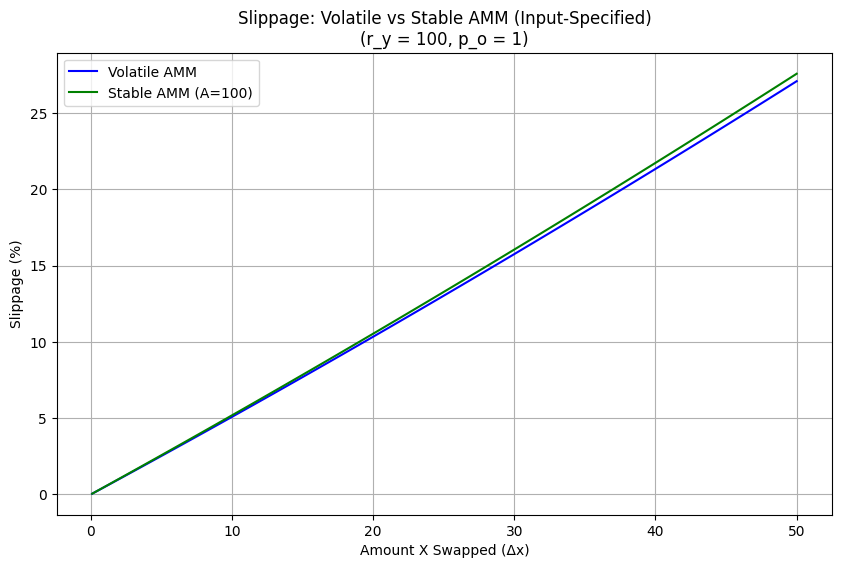


Test Results:
Volatile: Pay 10.0 X, get 9.5163 Y, slippage 5.08%
Stable: Pay 10.0 X, get 9.5072 Y, slippage 5.18%
Volatile: Want 10.0 Y, pay 10.5361 X, slippage 5.36%
Stable: Want 10.0 Y, pay 10.5250 X, slippage 5.25%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Volatile AMM (X-to-Y, input-specified)
def swap_x_to_y_volatile_input(amount_x, reserve_y, oracle_price):
    """
    Calculate Δy (Y output) given Δx (X input) for volatile AMM.
    """
    if amount_x <= 0:
        return 0.0
    delta_y = reserve_y * (1 - np.exp(-amount_x / (oracle_price * reserve_y)))
    return min(delta_y, reserve_y * 0.999)  # Prevent depletion

# Stable AMM (X-to-Y, input-specified)
def swap_x_to_y_stable_input(amount_x, reserve_y, oracle_price, A=100):
    """
    Calculate Δy (Y output) given Δx (X input) for stable AMM.
    """
    if amount_x <= 0:
        return 0.0
    denominator = oracle_price * reserve_y + amount_x / A
    delta_y = reserve_y * (1 - np.exp(-amount_x / denominator))
    return min(delta_y, reserve_y * 0.999)  # Prevent depletion

# Volatile AMM (X-to-Y, output-specified, for reference)
def swap_x_to_y_volatile_output(amount_y, reserve_y, oracle_price):
    """
    Calculate Δx (X input) given Δy (Y output) for volatile AMM.
    """
    if amount_y >= reserve_y:
        return float('inf')
    return -oracle_price * reserve_y * np.log(1 - amount_y / reserve_y)

# Stable AMM (X-to-Y, output-specified, for reference)
def swap_x_to_y_stable_output(amount_y, reserve_y, oracle_price, A=100):
    """
    Calculate Δx (X input) given Δy (Y output) for stable AMM.
    """
    if amount_y >= reserve_y:
        return float('inf')
    z = amount_y / reserve_y
    k = -np.log(1 - z)
    return (k * oracle_price * reserve_y) / (1 + k / A)

# Plot slippage comparison
def plot_slippage_comparison():
    reserve_y = 100.0
    oracle_price = 1.0
    A = 100
    dx_range = np.linspace(0.1, 50.0, 100)
    
    slippage_volatile = []
    slippage_stable = []
    
    for dx in dx_range:
        dy_volatile = swap_x_to_y_volatile_input(dx, reserve_y, oracle_price)
        dy_stable = swap_x_to_y_stable_input(dx, reserve_y, oracle_price, A)
        
        eff_price_volatile = dx / dy_volatile if dy_volatile > 0 else oracle_price
        eff_price_stable = dx / dy_stable if dy_stable > 0 else oracle_price
        
        slippage_volatile.append((eff_price_volatile - oracle_price) / oracle_price * 100)
        slippage_stable.append((eff_price_stable - oracle_price) / oracle_price * 100)
    
    plt.figure(figsize=(10, 6))
    plt.plot(dx_range, slippage_volatile, label='Volatile AMM', color='blue')
    plt.plot(dx_range, slippage_stable, label=f'Stable AMM (A={A})', color='green')
    plt.xlabel('Amount X Swapped (Δx)')
    plt.ylabel('Slippage (%)')
    plt.title('Slippage: Volatile vs Stable AMM (Input-Specified)\n(r_y = 100, p_o = 1)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test both directions
def test_swaps():
    reserve_y = 100.0
    oracle_price = 1.0
    A = 100
    
    # Input-specified (Δx -> Δy)
    dx = 10.0
    dy_volatile = swap_x_to_y_volatile_input(dx, reserve_y, oracle_price)
    dy_stable = swap_x_to_y_stable_input(dx, reserve_y, oracle_price, A)
    print(f"Volatile: Pay {dx} X, get {dy_volatile:.4f} Y, slippage {(dx/dy_volatile-1)*100:.2f}%")
    print(f"Stable: Pay {dx} X, get {dy_stable:.4f} Y, slippage {(dx/dy_stable-1)*100:.2f}%")
    
    # Output-specified (Δy -> Δx)
    dy = 10.0
    dx_volatile = swap_x_to_y_volatile_output(dy, reserve_y, oracle_price)
    dx_stable = swap_x_to_y_stable_output(dy, reserve_y, oracle_price, A)
    print(f"Volatile: Want {dy} Y, pay {dx_volatile:.4f} X, slippage {(dx_volatile/dy-1)*100:.2f}%")
    print(f"Stable: Want {dy} Y, pay {dx_stable:.4f} X, slippage {(dx_stable/dy-1)*100:.2f}%")

if __name__ == "__main__":
    plot_slippage_comparison()
    print("\nTest Results:")
    test_swaps()